In [1]:
import random
import networkx as nx

### **Familiarization**

In [ ]:
G=nx.Graph() #Creating and empty graph
G.add_node(1) #Adding a node to the graph
G.add_nodes_from([2,3])  #without attributes for the node
# G.add_nodes_from([(2,{"color":"red"}),(3,{"color":"green"})]) #with attritubes for the nodes
H=nx.path_graph(10)
print(H)
print(G)

Graph with 10 nodes and 9 edges
Graph with 3 nodes and 0 edges


In [ ]:
A=nx.Graph()
# A.add_nodes_from([1,2]) #[labels]
A.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
A[4]
A.add_edge(4,5)
nx.draw(A,with_labels=True)

In [ ]:
A = nx.Graph(day="Friday")
if A.graph["day"]=="Friday":
  A.graph
# {'day': 'Friday'}

### PreOrder and PostOrder traversal Iteratively

In [ ]:
class Tree():
  def __init__(self,key):
    self.left=None
    self.right=None
    self.val=key
  
  def insert(self, val):
    if self.val:
        if val < self.val:
          if self.left is None:
              self.left = Tree(val)
          else:
              self.left.insert(val)
        elif val > self.val:
          if self.right is None:
              self.right = Tree(val)
          else:
              self.right.insert(val)
        else:
          self.val = val
  def write(self):
    if self.left:
      self.left.write()
    print( self.val)
    if self.right:
        self.right.write()



# root = Tree(1)
# i=2
# while i in range(7):
#   root.insert(i)
#   i+=1
# Tree.write(root)



In [ ]:
visited = []
def preOrderIterative(root):
  if root == None:
    return 
  stack = []
  stack.append(root)
  while stack:
    node = stack.pop()
    visited.append(node.val)
    if node.right!=None:
      stack.append(node.right)
    if node.left!=None:
      stack.append(node.left)
  print(visited)  

root = Tree(1)
i=2
while i in range(7):
  root.insert(i)
  i+=1
# Tree.write(root)


preOrderIterative(root)





[1, 2, 3, 4, 5, 6]


In [ ]:
def postOrderIterative(root):
  traversal=[]
  stack = [(root,'t')]
  while stack:
    (node,purpose) = stack.pop()
    if node:
      if purpose == 'p':
        traversal.append(node.val)
      else:
        stack.append((node,'p'))
        stack.append((node.right,'t'))
        stack.append((node.left,'t'))
  print(traversal)

# root = Tree(1)
# i=2
# while i in range(8):
#   root.insert(i)
#   i+=1
# Tree.write(root)
root = Tree(7)
root.insert(5)
root.insert(9)

postOrderIterative(root)

[5, 9, 7]


### **Generate Random Graph**

In [ ]:
def generateRandomGraph(nodes):
    G = nx.Graph()                                  #creating an empty graph
    # if(nodes<2):
    #     print("please enter more than 2 nodes")
    #     return G
    for i in range(nodes):                        # Adding nodes to the graph
        G.add_node(i)
        # print(i)
    for i in range(nodes):
        x = random.randrange(0,nodes)             #Generating two random numbers to create an edge
        y = random.randrange(0,nodes)
        while y==x:                            # condition so that there are no self edge
            y = random.randint(0,nodes)
        G.add_edge(x,y)                       #Adding an edge to the graph
    return G


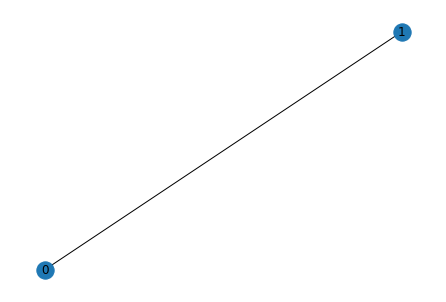

In [ ]:
A = generateRandomGraph(2)
nx.draw(A,with_labels=True)

### **Generate Random Digraph**

In [ ]:
def generateRandomDigraph(nodes):
    G = nx.DiGraph()                    #creating a empty directed graph
    V=G.nodes(data=True)                #setting a node attrribute to true
    # if(nodes<2):
    #     print("please enter more than 2 nodes")
    #     return G
    iterations = nodes -1             #so that there is no bidirectional edge
    for i in range(nodes):         
        G.add_node(i)                  #adding nodes to the graph
        V[i]["on path"]=False          #setting the attribute on path to false
    for i in range(iterations):
        x = random.randint(0,nodes)
        y = random.randint(0,nodes)
        while y==x:
            y = random.randint(0,nodes)
        G.add_edge(x,y)
    return G

[1]

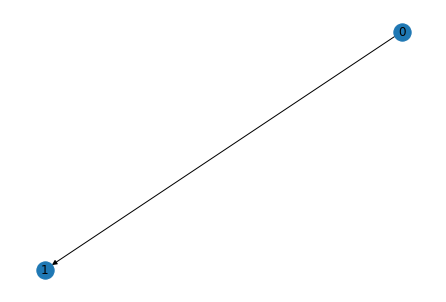

In [ ]:
B = generateRandomDigraph(2)
nx.draw(B,with_labels=True)

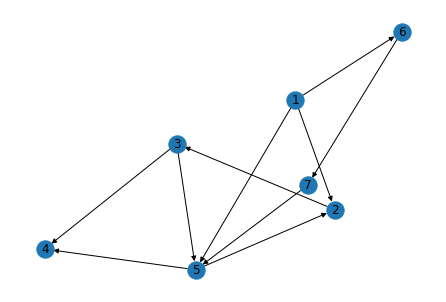

In [2]:
dh = nx.DiGraph()
dh.add_edges_from([(1,2),(1,6),(2,3),(3,4),(3,5),(5,4),(5,2),(7,5),(6,7),(1,5)])
V=dh.nodes(data=True)
for node in dh:
    V[node]["onpath"] = False
dTree = nx.DiGraph()
nx.draw(dh,with_labels=True)

In [3]:
visited = []
dfsNumberedGraph = []

### **DFS**

In [ ]:
def dfs(G,node):
    if node not in visited:
        visited.append(node)
        for nbdnode in G[node]:
            if nbdnode not in visited:
                dfs(G,nbdnode)

In [ ]:
dfs(dh,1)
print(visited)

### **DFS Iterative**

In [ ]:
visited =[]
def dfsIterative(G,node):
  stack = []
  stack.append(node)
  while stack:
    vertex = stack.pop()
    if vertex not in visited:
      visited.append(vertex)
    for nbdnode in dict(reversed(list(G[vertex].items()))):
      if nbdnode not in visited:
        stack.append(nbdnode)
  


# dfsIterative(dh,1)
# dh[1]
print(visited)

[1, 2, 3, 4, 5, 6, 7]


### **DFS Numbering**

In [ ]:
def dfsNumbering(lst):
    i=1
    for node in lst:
        dfsNumberedGraph.append((node,i))
        i+=1

### **DFS Tree**

In [4]:
def dfsTree(G,dTree,node):
    v=G.nodes(data=True)
    if node not in visited:
        visited.append(node)
        v[node]["on path"] = True
        for nbdnode in G.successors(node):
            if nbdnode not in visited:
                dTree.add_edge(node,nbdnode,color='black')
                dfsTree(G,dTree,nbdnode)
            else:
                nodeIndex = visited.index(node)+1
                nbdnodeIndex = visited.index(nbdnode)+1
                if v[nbdnode]["on path"]==False:
                    if nodeIndex>nbdnodeIndex:
                        dTree.add_edge(node,nbdnode,color='r')
                    else:
                       dTree.add_edge(node,nbdnode,color='g')
                else:
                    if nodeIndex>nbdnodeIndex:
                        dTree.add_edge(node,nbdnode,color='b')
                    
        v[node]["on path"] = False

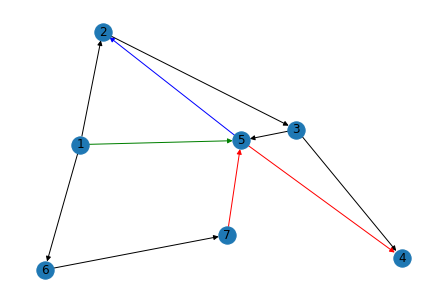

In [7]:
colors = nx.get_edge_attributes(dTree,'color').values()

dfsTree(dh,dTree,1)
nx.draw(dTree,edge_color=colors,with_labels = True)

### **Preorder Traversal**

In [ ]:
traversed = []
def preOrder(G,node):
    if node not in traversed:
        traversed.append(node)
        for nbdnode in G[node]:
            if nbdnode not in traversed:
                preOrder(G,nbdnode)

In [ ]:
C = nx.balanced_tree(2,2)
nx.draw(C,with_labels=True)
preOrder(C,0)
print(traversed) 

### **PostOrder Traversal**

In [ ]:
traversed = []
trav = []
def postOrder(G,node):
    if node not in traversed:
        for nbdnode in G[node]:
          if node not in trav:
            trav.append(node)
          if nbdnode not in traversed:
            if nbdnode not in trav:
              postOrder(G,nbdnode)
        traversed.append(node)

In [ ]:
D = nx.balanced_tree(2,2)
nx.draw(D,with_labels=True)
postOrder(D,0)
print(traversed) 